# Seaborn
- matplotlib을 기반으로 다양한 테마와 그래프를 제공하는 파이썬 시각화 패키지
- http://seaborn.pydata.org/
    - 공식 사이트의 [gallary](http://seaborn.pydata.org/examples/index.html)에 제공하는 다양한 그래프와 예제를 확인 가능
- 설치: 아나콘다(base)에는 포함
```
pip install seaborn
conda install seaborn
```
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# pandas에서 데이터 가져오기 
df = pd.read_csv('data/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# seaborn에서 toy dataset(패키지에서 사용할수 있는 연습용 데이터) 가져오기
tips = sns.load_dataset('tips') # seaborn에서 제공하는 toy dataset을 DataFrame으로 가져오는 함수
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## rugplot, kdeplot, distplot
- 1차원 연속형 값들의 분포를 시각화 하는 그래프

### rugplot 
- 각 데이터들의 위치를 표시

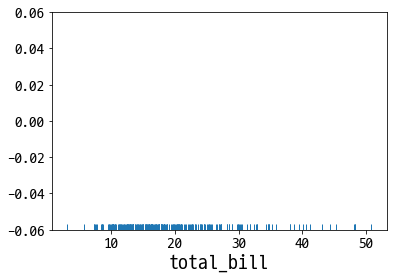

In [4]:
sns.rugplot(tips['total_bill'])
plt.show()

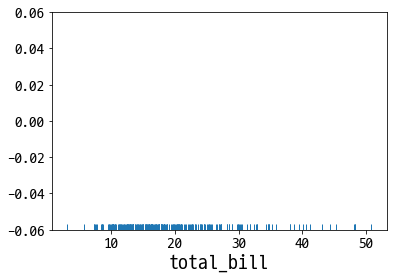

In [5]:
# seaborn은 DataFrame과 연동이 mataplotlib보다 쉬움
# 그래프 생성 시 사용할 값에 컬럼명 지정, data=DataFrame을 지정
sns.rugplot('total_bill', data=tips)
plt.show()

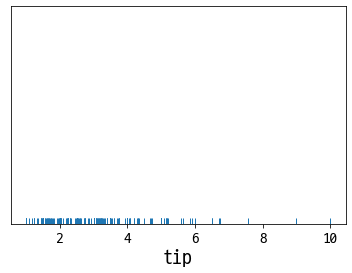

In [6]:
# y축 눈금 삭제
sns.rugplot('tip', data=tips)
plt.yticks([])
plt.show()

### kdeplot
- 히스토그램을 부드러운 곡선 형태로 표현
- KDE(Kernel Density Estimation) : 확률밀도추정

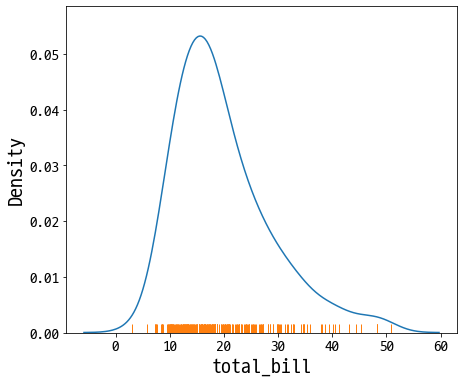

In [7]:
plt.figure(figsize=(7,6))
sns.kdeplot('total_bill', data=tips) # y축 : 수량의 비율 (총면적 : 1)
sns.rugplot('total_bill', data=tips)
plt.show()

### distplot
- 히스토그램에 kdeplot, rugplot 한번에 생성
    - kdeplot은 default로 나오고 rugplot은 default로 나오지 않음

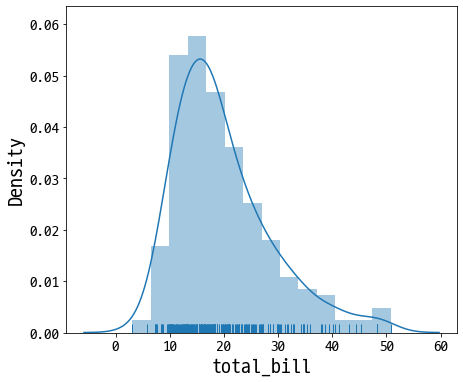

In [8]:
plt.figure(figsize=(7,6))
sns.distplot(tips['total_bill'], # data=DF 형식으로 호출 불가
             hist=True, # hist= : 히스토그램 생성여부 (default : True)
             kde=True,  # kde= : kdeplot 생성여부 (default : True)
             rug=True   # rug= : rugplot 생성여부 (default : False)
            )
plt.show()

<Figure size 504x504 with 0 Axes>

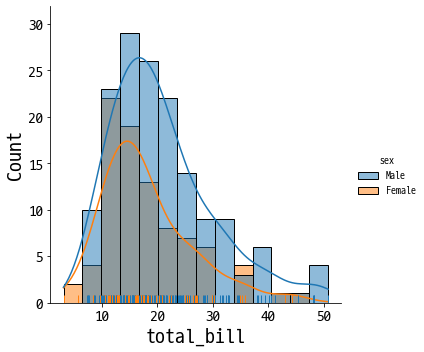

In [9]:
# group 별로 나눠서 히스토그램, rugplot, kedplot등을 확인
# displot() : 그룹별로 나누어 시각화
# distplot() : 하나의 컬럼에 대해서만 시각화
# 남성/여성 별 : total_bill 분포를 비교
plt.figure(figsize=(7,7))
sns.displot(x='total_bill', data=tips,
            hue='sex', # hue= : 분류 기준
            kde=True,  # kde= : kdeplot 생성여부 (default : False)
            rug=True   # rug= : rugplot 생성여부 (default : False)
           )
plt.show()

## boxplot(), violinplot(), swamplot()
- 연속형 데이터(양적데이터)들의 분포를 확인하는 그래프를 생성
- 범주별로 연속형 데이터의 분포를 비교 가능

### boxplot

#### 하나의 figure에 다수의 axes를 이용한 컬럼 시각화

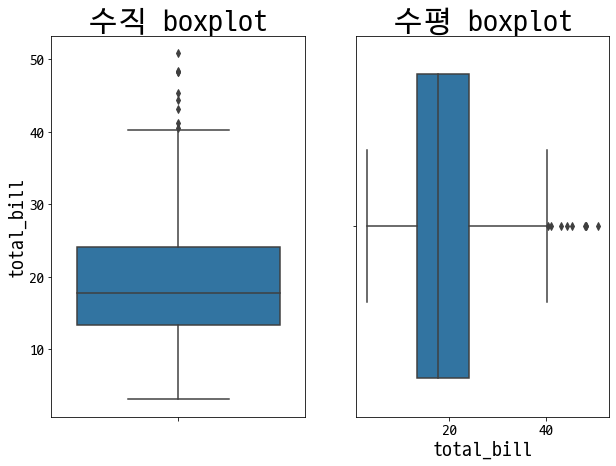

In [10]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.boxplot(y=tips['total_bill'])
plt.title('수직 boxplot')
plt.subplot(1,2,2)
sns.boxplot(x=tips['total_bill'])
plt.title('수평 boxplot')
plt.show()

#### 하나의 axes에 다수의 컬럼 시각화

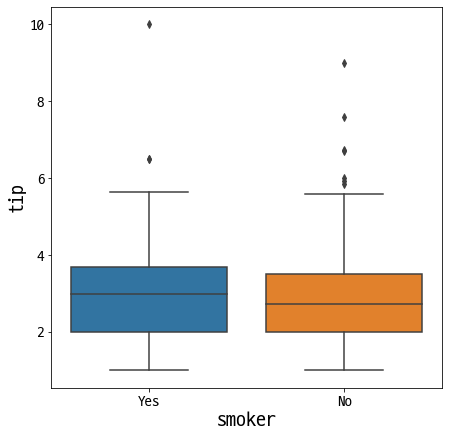

In [11]:
# 흡연여부 별 tip 분포를 boxplot비교
plt.figure(figsize=(7,7))
sns.boxplot(y='tip', x='smoker', data=tips)
plt.show()

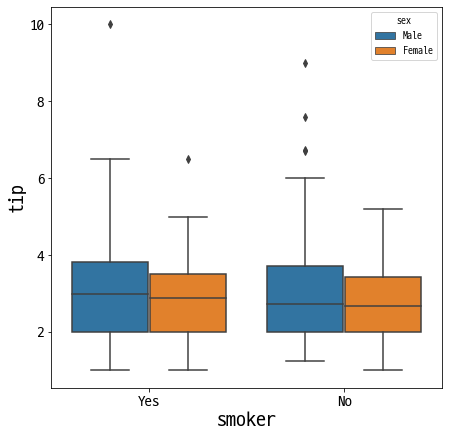

In [12]:
# 흡연과 성 별 tip 분포를 boxplot비교
plt.figure(figsize=(7,7))
sns.boxplot(y='tip', x='smoker', hue='sex', data=tips)
plt.show()

### violin plot
- boxplot 위에 분포 밀도(kernel density)를 좌우 대칭으로 덮어쓰는 방식으로 데이터의 분포를 표현하므로 boxplot 보다 좀더 정확한 데이터의 분포를 확인 가능
- 매개변수는 boxplot과 동일

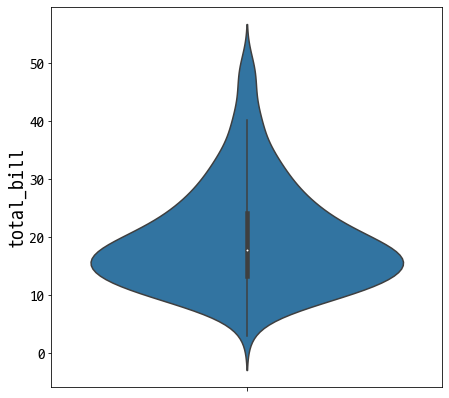

In [13]:
plt.figure(figsize=(7,7))
sns.violinplot(y=tips['total_bill'])
plt.show()

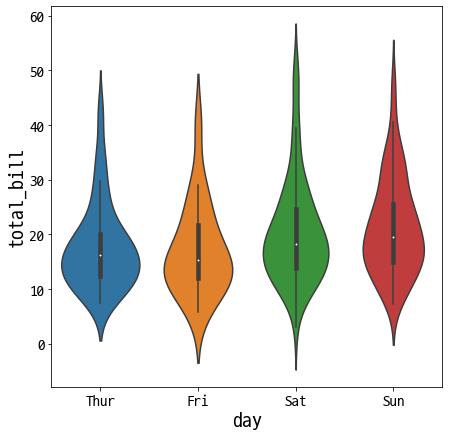

In [14]:
# 요일 별(data) 분포
plt.figure(figsize=(7,7))
sns.violinplot(y='total_bill', x='day', data=tips)
plt.show()

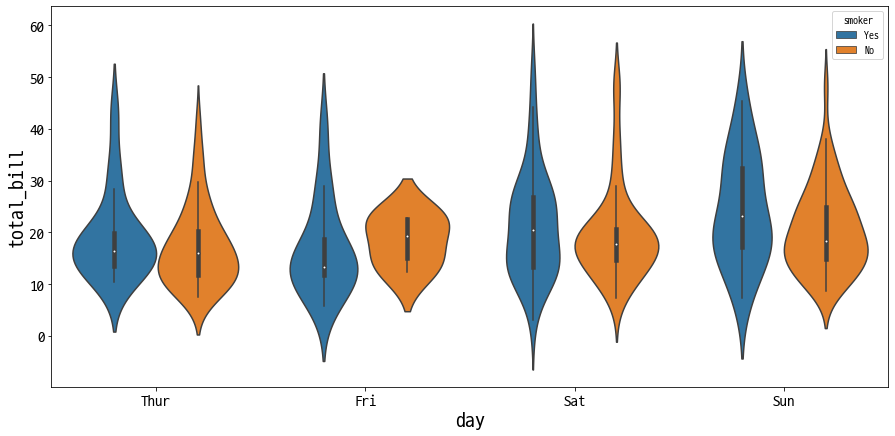

In [15]:
# 요일, 흡연 별(data) 분포
plt.figure(figsize=(15,7))
sns.violinplot(y='total_bill', x='day', hue='smoker', data=tips)
plt.show()

### swarmplot
- 실제 값들을 점으로 표시 
- boxplot이나 violin plot의 보안해주는 역할
- swarmplot은 가운데 분류를 기준으로 분포시키는데 실제 값이 있는 위치에 점을 찍으므로 좀더 정확하게 값이 어디에 있는지 확인

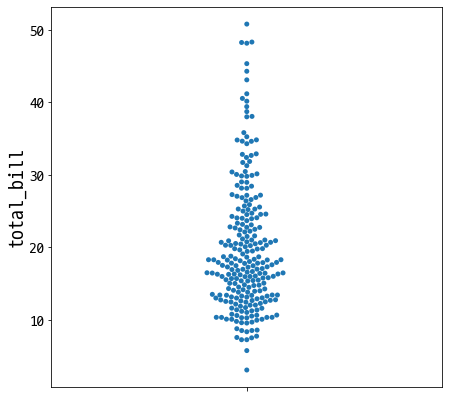

In [16]:
plt.figure(figsize=(7,7))
sns.swarmplot(y='total_bill', data=tips)
plt.show()

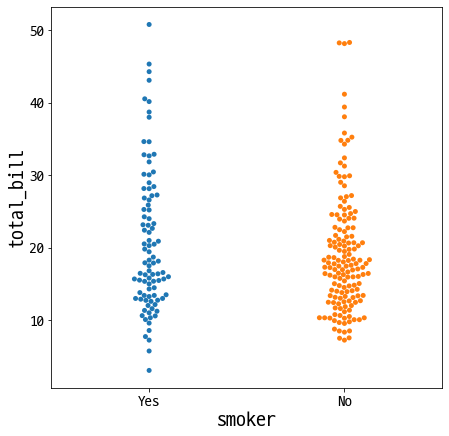

In [17]:
# 흡연 별 분포
plt.figure(figsize=(7,7))
sns.swarmplot(y='total_bill', x='smoker', data=tips)
plt.show()

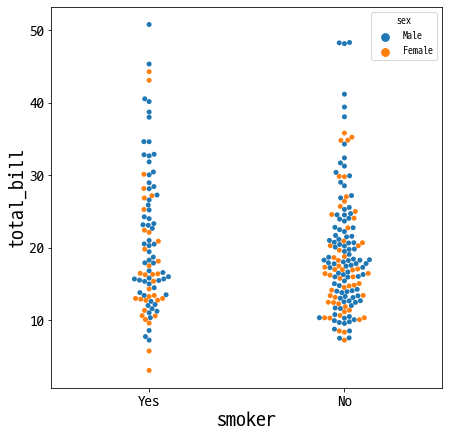

In [18]:
# 성별, 흡연별 total_bill분포
plt.figure(figsize=(7,7))
sns.swarmplot(y='total_bill', x='smoker', hue='sex', data=tips)
plt.show()

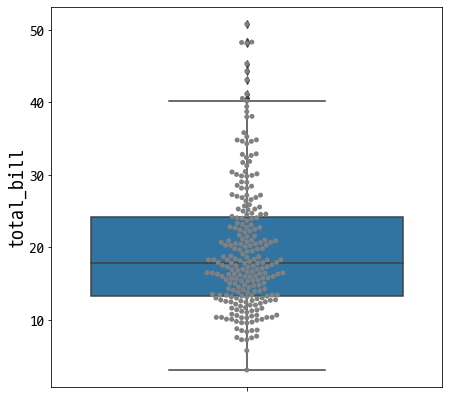

In [19]:
# boxplot과 같이 비교
plt.figure(figsize=(7,7))
sns.swarmplot(y='total_bill', data=tips, color='grey')
sns.boxplot(y='total_bill', data=tips)
plt.show()

### countplot() 
- 막대그래프(bar plot)을 그리는 함수
- 범주형 변수의 고유값의 개수를 표시
- matplotlib의 bar()

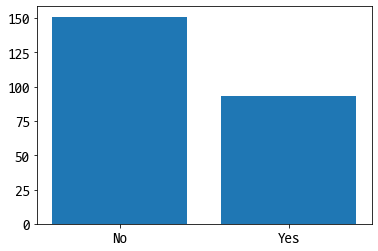

In [20]:
# matplotlib : 개수를 새는 작업 후 그 결과를 시각화
s = tips['smoker'].value_counts()
plt.bar(s.index, s)
plt.show()

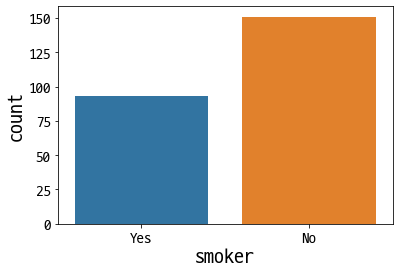

In [21]:
sns.countplot(x='smoker', data=tips) # 범주형 컬럼을 x에 전달: 범주값별로 개수를 세서 생성
plt.show()

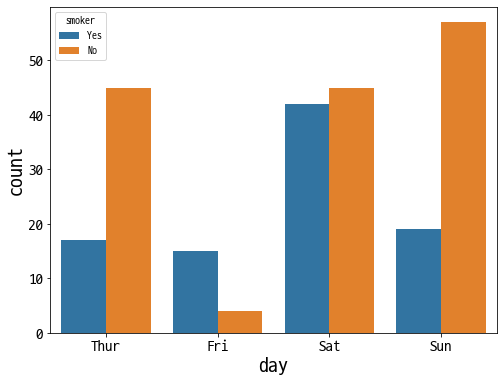

In [22]:
# 요일 별 흡연/비흡연자 수
plt.figure(figsize=(8,6))
sns.countplot(x='day', hue='smoker', data=tips)
plt.show()

## scatterplot, lmplot, jointplot, pairplot
- 산점도를 그린다.

### scatterplot

팔레트 - https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

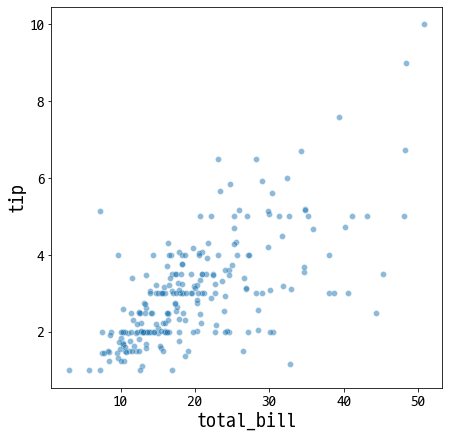

In [23]:
# total_bill과 tip의 상관관계
plt.figure(figsize=(7,7))
sns.scatterplot(x='total_bill', y='tip', data=tips, alpha=0.5)
plt.show()

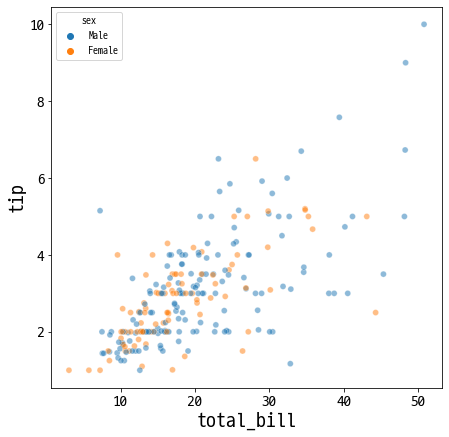

In [24]:
# 성 별 total_bill과 tip의 상관관계
plt.figure(figsize=(7,7))
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=tips, alpha=0.5)
plt.show()

### lmplot()
- 선형회귀 적합선을 포함한 산점도를 생성
    - 선형회귀 적합선 : 상관관계를 표현하는 선

<Figure size 504x504 with 0 Axes>

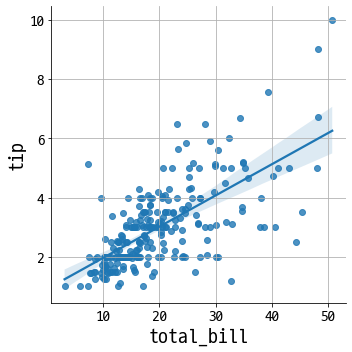

In [25]:
plt.figure(figsize=(7,7))
sns.lmplot(x='total_bill', y='tip', data=tips)
plt.grid(True)
plt.show()

<Figure size 504x504 with 0 Axes>

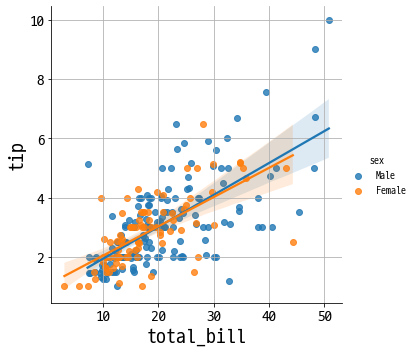

In [26]:
# 성 별 분류
plt.figure(figsize=(7,7))
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips)
plt.grid(True)
plt.show()

### jointplot()
- scatter plot 과 각 변수의 히스토그램을 같이 생성
- pandas **DataFrame**만 사용 가능
 - 컬럼명과 DataFrame을 따로 설정

<Figure size 504x504 with 0 Axes>

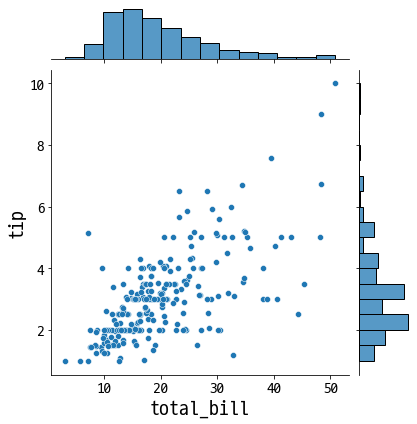

In [27]:
plt.figure(figsize=(7,7))
sns.jointplot(x='total_bill', y='tip', data=tips)
plt.show()

<Figure size 504x504 with 0 Axes>

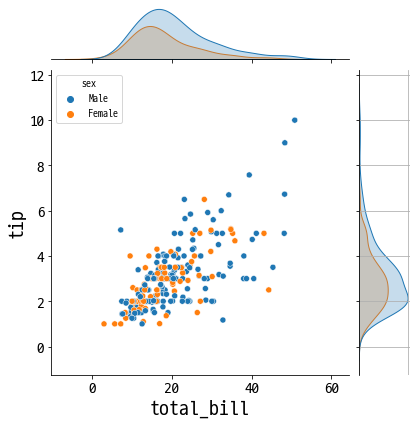

In [28]:
# 성 별 분류
plt.figure(figsize=(7,7))
sns.jointplot(x='total_bill', y='tip', hue='sex', data=tips)
plt.grid(True)
plt.show()

### pairplot
- 다변수(다차원) 데이터들 간의 산점도를 표시 
- 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 변수간의 산점도 생성, 같은 변수가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 생성

<Figure size 1080x1080 with 0 Axes>

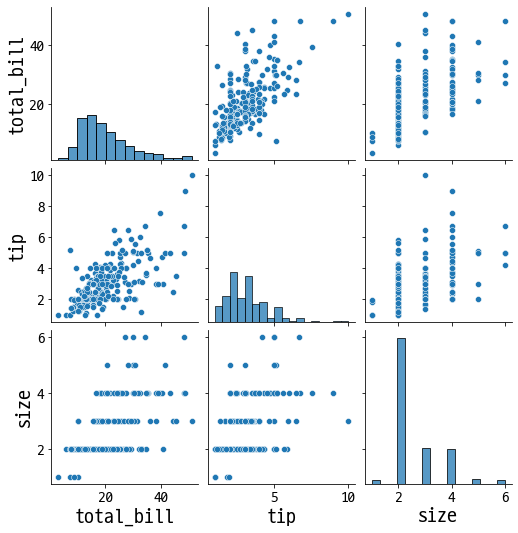

In [29]:
plt.figure(figsize=(15,15))
sns.pairplot(tips) # 매개변수: DataFrame -> 수치형 컬럼만 이용
plt.show()

### heatmap()
- 값들에 비레해서 색깔을 다르게 해 2차원 자료로 시각화

In [30]:
# total_bill, tip, size의 상관계수
corr = tips[['total_bill', 'tip', 'size']].corr()
corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


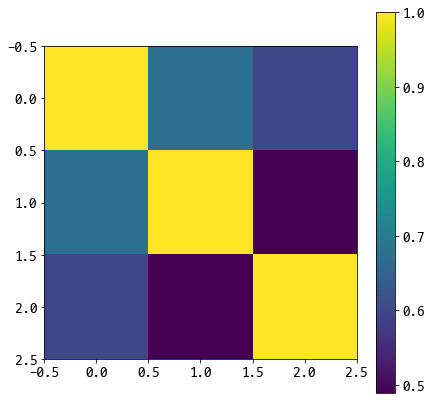

In [31]:
# matplotlib : imshow() im:image -> pixcel값(정수)을 rendering(이미지화)
plt.figure(figsize=(7,7))
plt.imshow(corr)
plt.colorbar()
plt.show()

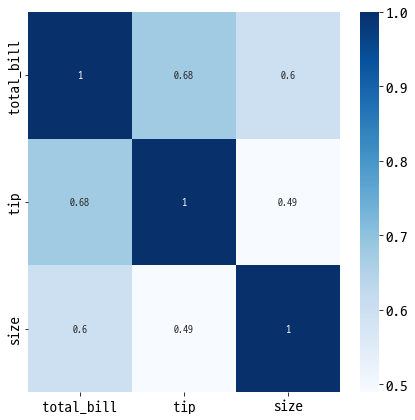

In [32]:
#seaborn
plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, # 숫자표시
            cmap='Blues'# cmap= : 그라데이션 색 설정, 미리 사용할 색을 모아둔 것(colormap/palette)
           )
plt.show()

### lineplot
- 선그래프
- 시간의 흐름에 따른 값의 변화를 보여주는데 유용 (시계열 데이터)

In [33]:
wb = pd.read_excel('data/webbrowser_share.xls', converters={'date':np.str})
wb.set_index('date', inplace=True)
wb

,Chrome,Edge,IE,Whale Browser,Safari,Firefox,Opera,Edge Legacy,360 Safe Browser,Pale Moon,Sogou Explorer,QQ Browser,Swing,Yandex Browser,Mozilla,Maxthon,Coc Coc
date,,,,,,,,,,,,,,,,,
2021.06,70.43,12.84,5.85,5.45,2.46,1.72,0.59,0.22,0.21,0.00,0.05,0.04,0.03,0.03,0.02,0.02,0.02
2021.07,69.90,13.71,5.56,5.23,2.42,1.84,0.71,0.19,0.18,0.00,0.04,0.03,0.03,0.07,0.02,0.02,0.02
2021.08,69.34,14.46,5.27,5.46,2.54,1.75,0.62,0.16,0.15,0.00,0.04,0.02,0.03,0.05,0.04,0.03,0.02
2021.09,69.92,14.57,4.53,5.52,2.50,1.74,0.69,0.17,0.13,0.00,0.03,0.02,0.03,0.05,0.03,0.02,0.02
2021.10,70.49,14.78,3.42,5.87,2.51,1.82,0.62,0.13,0.12,0.00,0.03,0.02,0.03,0.05,0.04,0.02,0.02
2021.11,70.57,14.88,3.17,5.90,2.57,1.77,0.64,0.11,0.14,0.00,0.03,0.04,0.02,0.04,0.04,0.01,0.02
2021.12,70.89,14.90,2.86,5.99,2.53,1.79,0.59,0.10,0.12,0.00,0.03,0.05,0.02,0.04,0.04,0.01,0.02
2022.01,71.09,15.18,2.58,5.79,2.55,1.86,0.58,0.09,0.09,0.00,0.02,0.02,0.01,0.03,0.04,0.01,0.03
2022.02,71.02,15.72,1.90,5.73,2.66,2.07,0.59,0.10,0.04,0.00,0.01,0.01,0.01,0.02,0.06,0.01,0.02


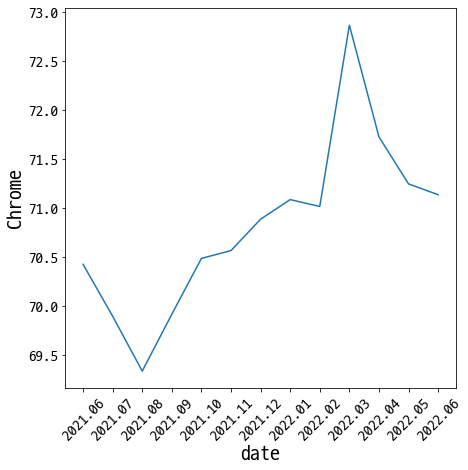

In [34]:
# sns.lineplot(x= 시간컬럼, y=변화값컬럼)
# x에 DataFrame의 index를 사용하는 경우 => 별도 조회 후 지정
plt.figure(figsize=(7,7))
sns.lineplot(x=wb.index, y='Chrome', data=wb)
plt.xticks(rotation=45) # rotation= : 라벨 각도 지정 
plt.show()

In [35]:
wb2 = wb[wb.columns[:4]]
wb2

,Chrome,Edge,IE,Whale Browser
date,,,,
2021.06,70.43,12.84,5.85,5.45
2021.07,69.90,13.71,5.56,5.23
2021.08,69.34,14.46,5.27,5.46
2021.09,69.92,14.57,4.53,5.52
2021.10,70.49,14.78,3.42,5.87
2021.11,70.57,14.88,3.17,5.90
2021.12,70.89,14.90,2.86,5.99
2022.01,71.09,15.18,2.58,5.79
2022.02,71.02,15.72,1.90,5.73


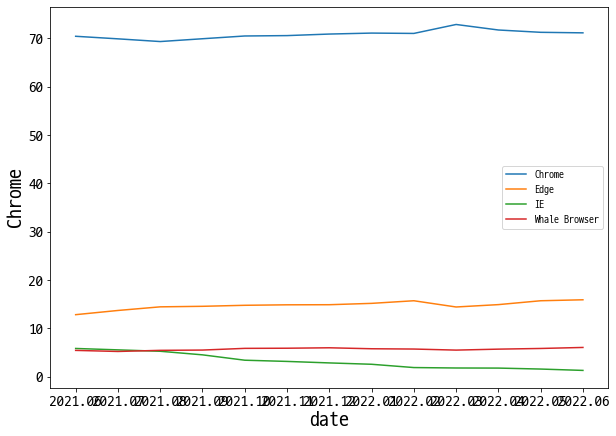

In [36]:
plt.figure(figsize=(10,7))
sns.lineplot(x=wb2.index, y='Chrome', label='Chrome', data=wb2)
sns.lineplot(x=wb2.index, y='Edge', label='Edge', data=wb2)
sns.lineplot(x=wb2.index, y='IE', label='IE', data=wb2)
sns.lineplot(x=wb2.index, y='Whale Browser', label='Whale Browser', data=wb2)
plt.show()